
## Steps:

### Step 1: Load Package and Custom Functions

1. Install/Import necesarry packages
2. Load custom functions
3. Input user defined metrics

In [1]:
# Import useful packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Install External Packages

!pip install xgboost catboost lightgbm pandas_profiling Boruta category_encoders MarkupSafe==2.0.1 iso-forest h2o eif==1.0.2 BorutaShap --user

## Basic Assumptions on the Dataset
The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.

*Potential Variable understanding amongst Var-4 to Var-163:-*

bureau: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.

bu eau_balance: monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.

pr vious_application: previous applications for loaSAViiCredit of clients who have loans in the application data. Each current loan in the application data can have multiple previous lny rows. 

c edit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.

 nstallments_payment: payment history for previoSAVii Hsed payment.

### Step 2: Data Preparation:

1. Import dataset
2. Profiling and EDA
3. Drop unwanted fields and convert column types
4. Null Treatment
5. Treating categorical features (one hot encoding, WOE encoding)
6. Train/Test Splitplitt

In [2]:
## Read Input Dataset
application_data = pd.read_csv(r'C:\Users\moina\SAVii_project\Data\Data sample - Data sample.csv')

# Data Prep

application_data = application_data.drop(columns=['Unnamed: 0'])

# Ordinal and Nominal Categorical Vars as Strings

string_columns = ['Var105', 'Var106', 'Var107', 'Var108', 'Var109', 'Var110' , 'Var111' , 'Var112', 'Var113' , 'Var116' , 'Var117', 
    'Var118', 'Var119' , 'Var120' , 'Var121', 'Var122', 'Var123' , 'Var124' , 'Var125' , 'Var135' , 'Var143' , 'Var29' , 
    'Var30' , 'Var32' , 'Var34' ,'Var45' , 'Var46' , 'Var47' , 'Var48' , 'Var49' , 'Var5' , 'Var50' , 'Var51' , 'Var60' ,
    'Var70' , 'Var71', 'Var74', 'Var75' ,'Var76' , 'Var77' , 'Var78' , 'Var79' , 'Var80' , 'Var86' , 'Var87' , 'Var88' , 'Var89' , 'Var90' , 'Var91' ,
    'Var133' , 'Var134' , 'Var162' , 'Var19' , 'Var23' , 'Var26' , 'Var27' , 'Var68' , 'Var93']

numeric_columns = ['Var10', 'Var114' , 'Var129' , 'Var13' , 'Var130' , 'Var131' , 'Var136' , 'Var14' , 'Var161' , 'Var163' , 'Var20' , 'Var21',
'Var22' , 'Var24' , 'Var25' , 'Var28' , 'Var35' , 'Var4' , 'Var44' , 'Var54' , 'Var55' , 'Var56' , 'Var57' , 'Var7' , 'Var72' , 
'Var73' , 'Var81' , 'Var82' , 'Var83' , 'Var84' , 'Var85' , 'Var9' , 'Var95' ]

null_handling_required = True


# Train and Test

WOE_encoding = True

target = [application_data['Target']]

train = application_data[application_data['Fold']=='IS']

test = application_data[application_data['Fold']=='OS']

shuffle_flag = True

stratify_flag = True


In [3]:
# Data Prep Functions

def data_prep(data, string_columns, numeric_columns,null_handling_required):
    try:
        data_v2 = data.copy()
            
        # Convert String Columns
        
        if len(string_columns)>0:
            data_v2[string_columns] = data_v2[string_columns].astype(str)
            print('{} Fields converted to string'.format(len(string_columns)))
        else:
            print('No Fields to Convert to String')
            
            
        # Convert NUmeric Columns
        
        if len(numeric_columns)>0:
            data_v2[numeric_columns] = data_v2[numeric_columns].astype(float)
            print('{} Fields converted to string'.format(len(numeric_columns)))
        else:
            print('No Fields to Convert to Numeric')
            
        #Null Treatment
        
        if null_handling_required == True:
            print('Number of records before dropping nulls:',len(data_v2))
            data_v2 = data_v2.dropna()
            print('Number of records after dropping nulls:',len(data_v2))
        else:
            print('No Null Treatment')
            
    except:
        print('Error: Reload data and check manual inputs')
        
    return data_v2


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from feature_engine.encoding import WoEEncoder

In [6]:
# Data Prep

df_v2 = data_prep(application_data, string_columns, numeric_columns,null_handling_required)
df_v2.info()
df_v2.head(n=2)

58 Fields converted to string
33 Fields converted to string
Number of records before dropping nulls: 13015
Number of records after dropping nulls: 13015
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13015 entries, 0 to 13014
Columns: 163 entries, ID to Var163
dtypes: float64(33), int64(71), object(59)
memory usage: 16.2+ MB


,ID,Fold,Target,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163
0,1,IS,0,40.0,3,1,5304.570,0,18.609524,8.0,...,0,0,0,1,0,0,0,53.0457,1,6.0
1,2,IS,0,26.0,4,1,884.095,0,25.970874,13.0,...,0,0,0,0,0,0,0,884.0950,3,5.0


In [7]:
train_set = df_v2[df_v2['Fold']=='IS']
test_set = df_v2[df_v2['Fold']=='OS']

In [8]:
train_features= train_set.loc[:, ~train_set.columns.isin(['Target','Fold', 'ID'])]
train_target = train_set['Target']

test_features= test_set.loc[:, ~test_set.columns.isin(['Target','Fold', 'ID'])]
test_target = test_set['Target']

In [9]:
import category_encoders as ce
from feature_engine.encoding import WoEEncoder

In [119]:

def WOE(train_features, test_features,train_target, test_target):
    WOE_columns = train_features.select_dtypes(exclude = [np.number]).columns
    
    woe_encoder = ce.WOEEncoder(cols = WOE_columns)
    
    WOE_encoded_train = woe_encoder.fit_transform(train_features[WOE_columns],train_target).add_suffix('_woe')
    train_features = pd.concat([train_features,WOE_encoded_train],axis=1)
    
    WOE_encoded_test = woe_encoder.transform(test_features[WOE_columns],test_target).add_suffix('_woe')
    test_features = pd.concat([test_features,WOE_encoded_test],axis=1)
    
    train_features_v2 = train_features.drop(WOE_columns,axis =1)
    test_features_v2 = test_features.drop(WOE_columns,axis =1)
    
    return train_features_v2, test_features_v2

In [120]:
train_features_v2, test_features_v2 = WOE(train_features, test_features, train_target, test_target)

In [121]:
# Get Feature Names
train_features_v2.columns

Index(['Var4', 'Var6', 'Var7', 'Var8', 'Var9', 'Var10', 'Var11', 'Var12',
       'Var13', 'Var14',
       ...
       'Var121_woe', 'Var122_woe', 'Var123_woe', 'Var124_woe', 'Var125_woe',
       'Var133_woe', 'Var134_woe', 'Var135_woe', 'Var143_woe', 'Var162_woe'],
      dtype='object', length=160)

In [13]:
train_features_v2 = train_features_v2.fillna(0)
train_features_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8242 entries, 0 to 8724
Columns: 160 entries, Var4 to Var162_woe
dtypes: float64(91), int64(69)
memory usage: 10.1 MB


# Step 3: Feature Selection

In [46]:
#Manual Inputs 

# Correlation

pearson_list = []
point_bi_serial_list = ['Var10', 'Var114' , 'Var129' , 'Var13' , 'Var130' , 'Var131' , 'Var136' , 'Var14' , 'Var161' , 'Var163' , 'Var20' , 'Var21',
'Var22' , 'Var24' , 'Var25' , 'Var28' , 'Var35' , 'Var4' , 'Var44' , 'Var54' , 'Var55' , 'Var56' , 'Var57' , 'Var7' , 'Var72' , 
'Var73' , 'Var81' , 'Var82' , 'Var83' , 'Var84' , 'Var85' , 'Var9' , 'Var95']

cramer_list = ['Var105_woe', 'Var106_woe', 'Var107_woe', 'Var108_woe', 'Var109_woe', 'Var110_woe' , 'Var111_woe' , 'Var112_woe', 'Var113_woe' , 'Var116_woe' , 'Var117_woe', 
    'Var118_woe', 'Var119_woe' , 'Var120_woe' , 'Var121_woe', 'Var122_woe', 'Var123_woe' , 'Var124_woe' , 'Var125_woe' , 'Var135_woe' , 'Var143_woe' , 'Var29_woe' , 
    'Var30_woe' , 'Var32_woe' , 'Var34_woe' ,'Var45_woe' , 'Var46_woe' , 'Var47_woe' , 'Var48_woe' , 'Var49_woe' , 'Var5_woe' , 'Var50_woe' , 'Var51_woe' , 'Var60_woe' ,
    'Var70_woe' , 'Var71_woe', 'Var74_woe', 'Var75_woe' ,'Var76_woe' , 'Var77_woe' , 'Var78_woe' , 'Var79_woe' , 'Var80_woe' , 'Var86_woe' , 'Var87_woe' , 'Var88_woe' , 'Var89_woe' , 'Var90_woe' , 'Var91_woe' ,
    'Var133_woe' , 'Var134_woe' , 'Var162_woe' , 'Var19_woe' , 'Var23_woe' , 'Var26_woe' , 'Var27_woe' , 'Var68_woe' , 'Var93_woe']

pearson_threshold = .5
point_bi_serial_threshold = .5
cramer_threshold = .1


# Information value

show_woe = True
iv_bins = 10
iv_threshold = .15

# Beta Coefficients

beta_threshold = 10


# Lasso

lasso_param = .01


# RFECV

rfe_estimator = "XGBoost"
rfe_step = 2
rfe_cv = 5
rfe_scoring = 'f1'


# Sequential Feature Selector

sfs_feature = 10
sfs_direction = 'backward'
sfs_cv = 2
sfs_scoring = 'r2'

# BorutaPy:
borutapy_estimator = "XGBoost"
borutapy_trials = 10
borutapy_green_blue = "both"

# BorutaShap:
borutashap_estimator = "XGBoost"
borutashap_trials = 10
borutashap_green_blue = 'both'


In [47]:
#1.Select the top n features based on absolute correlation with train_target variable

from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

################################ Functions #############################################################

# Function to calculate Cramer's V
def cramers_V(var1,var2) :
  crosstab=np.array(pd.crosstab(var1,var2, 
                                 rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab) 
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))



# Overall Correlation Function
def corr_feature_selection(data,target,pearson_list,
                           point_bi_serial_list,cramer_list,
                           pearson_threshold,
                           point_bi_serial_threshold,
                           cramer_threshold):
    
    #Inputs
    # data - Input feature data
    # target - Target Variable
    # pearson_list - list of continuous features (if target is continuous)
    # point_bi_serial_list - list of continuous features (if target is categorical)/
    #                        list of categorical features (if target is continuous)   
    # cramer_list - list of categorical features (if target is categorical)
    # pearson_threshold - select features if pearson corrrelation is above this
    # point_bi_serial_threshold - select features if biserial corrrelation is above this
    # cramer_threshold - select features if cramer's v is above this  
    
    corr_data = pd.DataFrame()

    # Calculate point bi-serial
    for i in point_bi_serial_list:
        # Manual Change in Parameters - Point Bi-Serial
        # Link to function parameters - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html
        pbc = pointbiserialr(target, data[i])   
        corr_temp_data = [[i,pbc.correlation,"point_bi_serial"]]
        corr_temp_df = pd.DataFrame(corr_temp_data, 
                                    columns = ['Feature', 
                                               'Correlation',
                                               'Correlation_Type'])
        corr_data = pd.concat([corr_data,corr_temp_df],  ignore_index=True)
        

    # Calculate cramer's v
    for i in cramer_list:
        cramer = cramers_V(target, data[i])
        corr_temp_data = [[i,cramer,"cramer_v"]]
        corr_temp_df = pd.DataFrame(corr_temp_data,
                                    columns = ['Feature',
                                               'Correlation',
                                               'Correlation_Type'])
        corr_data = pd.concat([corr_data,corr_temp_df],  ignore_index=True)


    # Calculate pearson correlation
    for i in pearson_list:
        # Manual Change in Parameters - Perason
        # Link to function parameters - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
        pearson = target.corr(data[i])
        corr_temp_data = [[i,pearson,"pearson"]]
        corr_temp_df = pd.DataFrame(corr_temp_data,
                                    columns = ['Feature',
                                               'Correlation',
                                               'Correlation_Type'])
        corr_data = pd.concat([corr_data,corr_temp_df],  ignore_index=True)


    # Filter NA and sort based on absolute correlation
    corr_data = corr_data.iloc[corr_data.Correlation.abs().argsort()] 
    corr_data = corr_data[corr_data['Correlation'].notna()]
    corr_data = corr_data.loc[corr_data['Correlation'] != 1]
    
    # Add thresholds
    
    # initialize list of lists
    data = [['pearson', pearson_threshold],
            ['point_bi_serial', point_bi_serial_threshold],
            ['cramer_v', cramer_threshold]]

    threshold_df = pd.DataFrame(data,
                                columns=['Correlation_Type',
                                         'Threshold'])
    corr_data = pd.merge(corr_data,threshold_df,
                         on=['Correlation_Type'],how = 'left')
    



    # Select Features with greater than user dfined absolute correlation
    corr_data2 = corr_data.loc[corr_data['Correlation'].abs() > corr_data['Threshold']]
    corr_top_features = corr_data2['Feature'].tolist()
    print(corr_top_features)
    corr_top_features_df = pd.DataFrame(corr_top_features,columns = ['Feature'])
    corr_top_features_df['Method'] = 'Correlation'
    return corr_data,corr_top_features_df



In [48]:
################################ Calculate Correlation #############################################################


corr_data,corr_top_features_df = corr_feature_selection(train_features_v2,train_target,
                                   pearson_list,point_bi_serial_list,
                                   cramer_list,pearson_threshold,
                                   point_bi_serial_threshold,cramer_threshold)
    
    
corr_data.tail(30)

C:\Users\moina\dep_conda\miniconda3\envs\myenv\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


[]


C:\Users\moina\AppData\Local\Temp\ipykernel_7300\553088266.py:77: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  corr_data = corr_data.iloc[corr_data.Correlation.abs().argsort()]


,Feature,Correlation,Correlation_Type,Threshold
60,Var28,0.031297,point_bi_serial,0.5
61,Var44,0.036457,point_bi_serial,0.5
62,Var91_woe,0.000645,cramer_v,0.1
63,Var133_woe,0.010670,cramer_v,0.1
64,Var161,-0.010744,point_bi_serial,0.5
65,Var21,-0.015485,point_bi_serial,0.5
66,Var131,-0.015607,point_bi_serial,0.5
67,Var13,-0.015623,point_bi_serial,0.5
68,Var130,0.016182,point_bi_serial,0.5
69,Var14,0.017826,point_bi_serial,0.5


In [49]:
#2. Select top features based on information value


################################ Functions #############################################################

def iv_woe(data, target, iv_bins,iv_threshold, show_woe):
    
    #Inputs
    # data - Input Data including target variable
    # target - Target Variable name
    # iv_bins - Number of iv_bins
    # show_woe - show all the iv_bins and features
    # iv_threshold - select features with IV greater than this
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], iv_bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % 
        # of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + 
              str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars],
                            "IV" : [d['IV'].sum()]},
                           columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    
    # Aggregate IV at feature level
    woeDF_v2 = pd.DataFrame(woeDF.groupby('Variable')['IV'].agg('sum'),
                            columns= ['IV']).reset_index()
    woeDF_v3 = woeDF_v2.sort_values(['IV'], ascending = False)
    IV_df = woeDF_v2[woeDF_v2['IV']> iv_threshold]
    woe_top_features = IV_df['Variable'].tolist()
    print(woe_top_features)
    woe_top_features_df = pd.DataFrame(woe_top_features,columns = ['Feature'])
    woe_top_features_df['Method'] = 'Information_value'
    return newDF, woeDF,IV_df, woe_top_features_df


In [50]:

################################ Calculate IV #############################################################


train_features_v3_temp = pd.concat([train_target, train_features_v2],
                                   axis =1)
newDF, woeDF,IV_df, woe_top_features_df = iv_woe(train_features_v3_temp,
                                                 'Target',iv_bins,iv_threshold, 
                                              show_woe)
woeDF.head(n=50)


C:\Users\moina\AppData\Local\Temp\ipykernel_7300\1685681029.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\moina\AppData\Local\Temp\ipykernel_7300\1685681029.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\moina\AppData\Local\Temp\ipykernel_7300\1685681029.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt th

Information value of Var4 is 0.091371
  Variable          Cutoff     N  Events  % of Events  Non-Events  \
0     Var4  (21.999, 28.0]  1035      32     0.160804        1003   
1     Var4    (28.0, 31.0]   853      27     0.135678         826   
2     Var4    (31.0, 33.0]   601      10     0.050251         591   
3     Var4    (33.0, 36.0]   994      32     0.160804         962   
4     Var4    (36.0, 38.0]   701      15     0.075377         686   
5     Var4    (38.0, 40.0]   769      19     0.095477         750   
6     Var4    (40.0, 43.0]  1054      16     0.080402        1038   
7     Var4    (43.0, 45.0]   597      19     0.095477         578   
8     Var4    (45.0, 49.0]  1017      20     0.100503         997   
9     Var4    (49.0, 55.0]   621       9     0.045226         612   

   % of Non-Events       WoE        IV  
0         0.124705  0.254238  0.009178  
1         0.102698  0.278495  0.009185  
2         0.073480 -0.379978  0.008826  
3         0.119607  0.295974  0.012193

C:\Users\moina\AppData\Local\Temp\ipykernel_7300\1685681029.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\moina\AppData\Local\Temp\ipykernel_7300\1685681029.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\moina\AppData\Local\Temp\ipykernel_7300\1685681029.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt th

Information value of Var94 is 0.006809
  Variable  Cutoff     N  Events  % of Events  Non-Events  % of Non-Events  \
0    Var94       0  7481     185     0.929648        7296         0.907124   
1    Var94       1   761      14     0.070352         747         0.092876   

        WoE        IV  
0  0.024527  0.000552  
1 -0.277755  0.006256  
Information value of Var95 is 0.136319
  Variable        Cutoff     N  Events  % of Events  Non-Events  \
0    Var95  (1.999, 3.5]   850      12     0.060302         838   
1    Var95    (3.5, 5.0]   818       9     0.045226         809   
2    Var95    (5.0, 7.0]  1023      19     0.095477        1004   
3    Var95    (7.0, 8.5]   928      17     0.085427         911   
4    Var95    (8.5, 9.5]   620      20     0.100503         600   
5    Var95   (9.5, 11.0]   834      24     0.120603         810   
6    Var95  (11.0, 12.5]   751      18     0.090452         733   
7    Var95  (12.5, 15.0]   892      34     0.170854         858   
8    Var95  

C:\Users\moina\AppData\Local\Temp\ipykernel_7300\1685681029.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\moina\AppData\Local\Temp\ipykernel_7300\1685681029.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\moina\AppData\Local\Temp\ipykernel_7300\1685681029.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt th

Information value of Var149 is 0.004081
  Variable  Cutoff     N  Events  % of Events  Non-Events  % of Non-Events  \
0   Var149       0  8239     199     1.000000        8040         0.999627   
1   Var149       1     3       0     0.002513           3         0.000373   

        WoE            IV  
0  0.000373  1.391513e-07  
1  1.907493  4.081211e-03  
Information value of Var150 is 0.000163
  Variable  Cutoff     N  Events  % of Events  Non-Events  % of Non-Events  \
0   Var150       0  8193     198     0.994975        7995         0.994032   
1   Var150       1    49       1     0.005025          48         0.005968   

        WoE            IV  
0  0.000948  8.937785e-07  
1 -0.171948  1.621124e-04  
Information value of Var151 is 0.002292
  Variable  Cutoff     N  Events  % of Events  Non-Events  % of Non-Events  \
0   Var151       0  7945     190     0.954774        7755         0.964192   
1   Var151       1   297       9     0.045226         288         0.035808   

       

C:\Users\moina\AppData\Local\Temp\ipykernel_7300\1685681029.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})


Information value of Var71_woe is 0.056174
    Variable    Cutoff     N  Events  % of Events  Non-Events  \
0  Var71_woe -0.102730  6892     151     0.758794        6741   
1  Var71_woe  0.191400   645      18     0.090452         627   
2  Var71_woe  0.560896   451      18     0.090452         433   
3  Var71_woe  0.778510   153       7     0.035176         146   
4  Var71_woe  0.856288    52       2     0.010050          50   
5  Var71_woe  1.520447    37       3     0.015075          34   
6  Var71_woe  1.743591    12       0     0.002513          12   

   % of Non-Events       WoE        IV  
0         0.838120 -0.099431  0.007887  
1         0.077956  0.148678  0.001858  
2         0.053836  0.518887  0.019000  
3         0.018152  0.661556  0.011262  
4         0.006217  0.480377  0.001842  
5         0.004227  1.271504  0.013793  
6         0.001492  0.521199  0.000532  
Information value of Var74_woe is 0.015931
    Variable    Cutoff     N  Events  % of Events  Non-Events  \


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Var4,"(21.999, 28.0]",1035,32,0.160804,1003,0.124705,0.254238,0.009178
1,Var4,"(28.0, 31.0]",853,27,0.135678,826,0.102698,0.278495,0.009185
2,Var4,"(31.0, 33.0]",601,10,0.050251,591,0.073480,-0.379978,0.008826
3,Var4,"(33.0, 36.0]",994,32,0.160804,962,0.119607,0.295974,0.012193
4,Var4,"(36.0, 38.0]",701,15,0.075377,686,0.085292,-0.123575,0.001225
5,Var4,"(38.0, 40.0]",769,19,0.095477,750,0.093249,0.023618,0.000053
6,Var4,"(40.0, 43.0]",1054,16,0.080402,1038,0.129056,-0.473210,0.023024
7,Var4,"(43.0, 45.0]",597,19,0.095477,578,0.071864,0.284118,0.006709
8,Var4,"(45.0, 49.0]",1017,20,0.100503,997,0.123959,-0.209766,0.004920
9,Var4,"(49.0, 55.0]",621,9,0.045226,612,0.076091,-0.520255,0.016058


In [51]:
#3. Select the top n features based on absolute value of beta coefficient of features

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

################################ Functions #############################################################

def beta_coeff(data, train_target,beta_threshold):
    
    #Inputs
    # data - Input feature data 
    # train_target - Target variable training data
    # beta_threshold - select n features with highest absolute beta coeficient value
    
    # Standardise dataset

    scaler = StandardScaler()
    data_v2 = pd.DataFrame(scaler.fit_transform(data))
    data_v2.columns = data.columns

    # Fit Logistic on Standardised dataset
    # Manual Change in Parameters - Logistic Regression
    # Link to function parameters - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html       
    log = LogisticRegression(fit_intercept = False, penalty = 'none')
    log.fit(data_v2, train_target)
    coef_table = pd.DataFrame(list(data_v2.columns)).copy()
    coef_table.insert(len(coef_table.columns), "Coefs", log.coef_.transpose())
    coef_table = coef_table.iloc[coef_table.Coefs.abs().argsort()]
    sr_data2 = coef_table.tail(beta_threshold)
    beta_top_features = sr_data2.iloc[:,0].tolist()
    print(beta_top_features)
    
    beta_top_features_df = pd.DataFrame(beta_top_features,columns = ['Feature'])
    beta_top_features_df['Method'] = 'Beta_coefficients'

    log_v2 = sm.Logit(train_target, sm.add_constant(data[beta_top_features])).fit()
    print('Logistic Regression with selected features')
    print(log_v2.summary())
    
    return log,log_v2,beta_top_features_df

################################ Calculate Beta Coeff ################################################

standardised_logistic,logistic_beta_features,beta_top_features_df = beta_coeff(train_features_v2,train_target,beta_threshold)


beta_top_features_df.head(n=20)

['Var134_woe', 'Var46_woe', 'Var11', 'Var32_woe', 'Var81', 'Var31', 'Var101', 'Var54', 'Var83', 'Var102']
Optimization terminated successfully.
         Current function value: 0.104110
         Iterations 9
Logistic Regression with selected features
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 8242
Model:                          Logit   Df Residuals:                     8231
Method:                           MLE   Df Model:                           10
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                 0.08481
Time:                        17:25:16   Log-Likelihood:                -858.08
converged:                       True   LL-Null:                       -937.59
Covariance Type:            nonrobust   LLR p-value:                 5.129e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

C:\Users\moina\dep_conda\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


,Feature,Method
0,Var134_woe,Beta_coefficients
1,Var46_woe,Beta_coefficients
2,Var11,Beta_coefficients
3,Var32_woe,Beta_coefficients
4,Var81,Beta_coefficients
5,Var31,Beta_coefficients
6,Var101,Beta_coefficients
7,Var54,Beta_coefficients
8,Var83,Beta_coefficients
9,Var102,Beta_coefficients


In [52]:
#4. Select the features identified by Lasso regression

################################ Functions #############################################################

def lasso(data, train_target,lasso_param):
    
    #Inputs
    # data - Input feature data 
    # train_target - Target variable training data
    # lasso_param - Lasso l1 penalty term
    
    #Fit Logistic
    # Manual Change in Parameters - Logistic Regression
    # Link to function parameters - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html       
    log = LogisticRegression(penalty ='l1', solver = 'liblinear', C = lasso_param)
    log.fit(data, train_target)
    
    #Select Features
    lasso_df = pd.DataFrame(columns = ['Feature', 'Lasso_Coef'])
    lasso_df['Feature'] = data.columns
    lasso_df['Lasso_Coef'] = log.coef_.squeeze().tolist()
    lasso_df_v2 = lasso_df[lasso_df['Lasso_Coef'] !=0]
    lasso_top_features = lasso_df_v2['Feature'].tolist()
    
    lasso_top_features_df = pd.DataFrame(lasso_top_features,columns = ['Feature'])
    lasso_top_features_df['Method'] = 'Lasso'


    # Logistic Regression with selected features
    log_v2 = sm.Logit(train_target, sm.add_constant(data[lasso_top_features])).fit()
    print('Logistic Regression with selected features')
    print(log_v2.summary())
    
    return log_v2,lasso_top_features_df


################################ Calculate Lasso ################################################

logistic_lasso_features,lasso_top_features_df = lasso(train_features_v2,train_target,lasso_param)

lasso_top_features_df.head(n=20)

Optimization terminated successfully.
         Current function value: 0.105021
         Iterations 8
Logistic Regression with selected features
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 8242
Model:                          Logit   Df Residuals:                     8226
Method:                           MLE   Df Model:                           15
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                 0.07680
Time:                        17:25:19   Log-Likelihood:                -865.58
converged:                       True   LL-Null:                       -937.59
Covariance Type:            nonrobust   LLR p-value:                 3.703e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Var4          -0.0120      0.010     -1.210      0.226      -0.03

,Feature,Method
0,Var4,Lasso
1,Var7,Lasso
2,Var9,Lasso
3,Var10,Lasso
4,Var13,Lasso
5,Var14,Lasso
6,Var20,Lasso
7,Var22,Lasso
8,Var24,Lasso
9,Var25,Lasso


Optimal number of features: 6
['Var70_woe', 'Var108_woe', 'Var111_woe', 'Var121_woe', 'Var133_woe', 'Var162_woe']


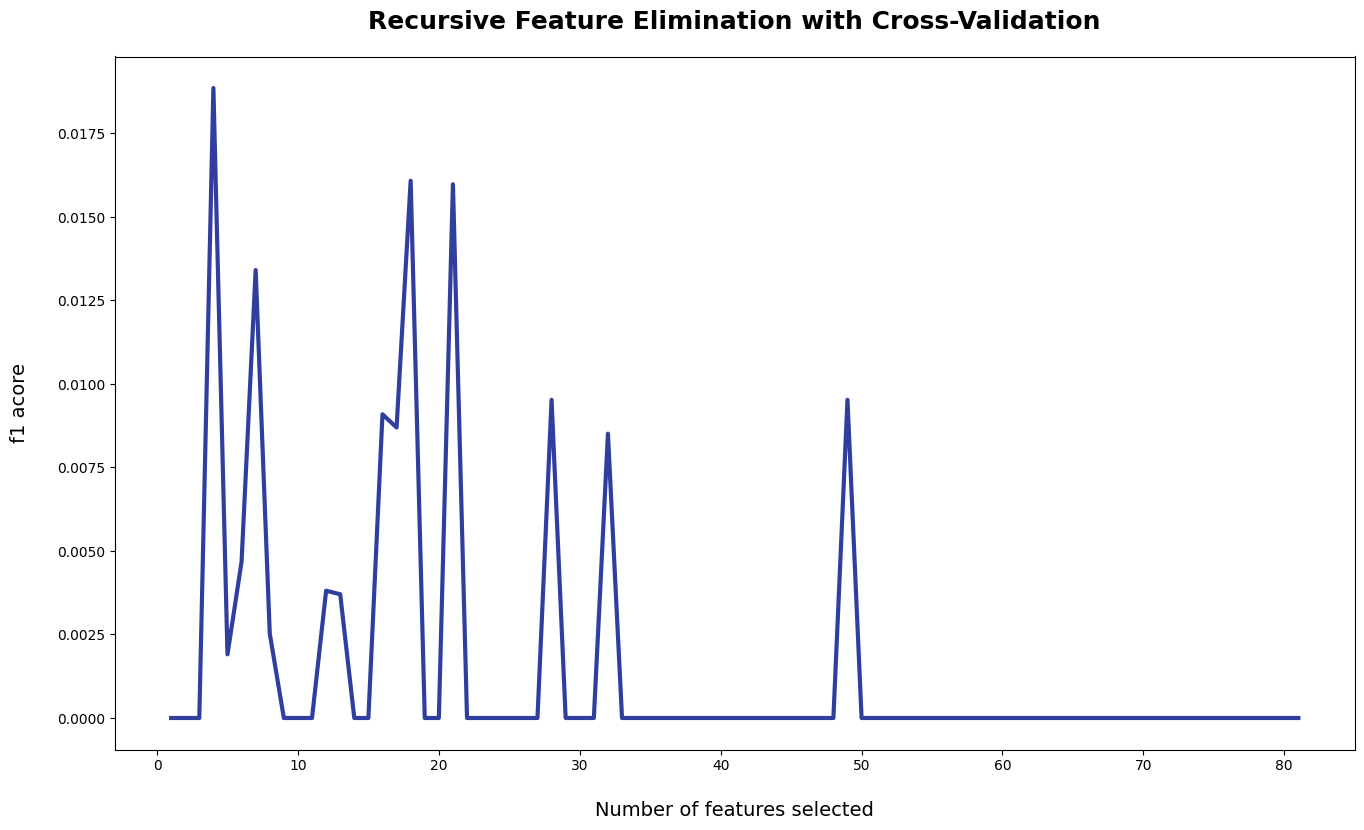

,Feature,Method
0,Var70_woe,RFECV
1,Var108_woe,RFECV
2,Var111_woe,RFECV
3,Var121_woe,RFECV
4,Var133_woe,RFECV
5,Var162_woe,RFECV


In [53]:
#5. Select features based on Recursive Feature Selection method

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


################################ Functions #############################################################

def rfecv_feature_selection(data, train_target,rfe_estimator,rfe_step,rfe_cv,rfe_scoring):
    
    #Inputs
    # data - Input feature data 
    # train_target - Target variable training data
    # rfe_estimator - base model (default: Decision Tree)
    # rfe_step -  number of features to remove at each iteration
    # rfe_cv - cross-validation splitting strategy
    # rfe_scoring - CV performance scoring metric
    

    ## Initialize RFE

    if rfe_estimator == "XGBoost":
        # Manual Change in Parameters - XGBoost
        # Link to function parameters - https://xgboost.readthedocs.io/en/stable/parameter.html       
        estimator_rfe = XGBClassifier(n_jobs = -1, random_state=101)
    elif rfe_estimator == "RandomForest":
        # Manual Change in Parameters - RandomForest
        # Link to function parameters - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
        estimator_rfe = RandomForestClassifier(n_jobs = -1, random_state=101)
    elif rfe_estimator == "CatBoost":
        # Manual Change in Parameters - CatBoost
        # Link to function parameters - https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier
        estimator_rfe = CatBoostClassifier(iterations=50,verbose=0,random_state=101)
    elif rfe_estimator == "LightGBM":
        # Manual Change in Parameters - LightGBM
        # Link to function parameters - https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
        estimator_rfe = lgb.LGBMClassifier(n_jobs = -1, random_state=101)
    else:
        # Manual Change in Parameters - DecisionTree
        # Link to function parameters - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
        estimator_rfe = DecisionTreeClassifier(random_state=101)


    # Fit RFECV
    # Manual Change in Parameters - RFECV
    # Link to function parameters - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
    # Scoring metrics - https://scikit-learn.org/stable/modules/model_evaluation.html
    rfecv = RFECV(estimator = estimator_rfe, step = rfe_step, cv = rfe_cv, scoring = rfe_scoring)
    rfecv.fit(data, train_target)

    # Select feature based on RFE
    print('Optimal number of features: {}'.format(rfecv.n_features_))
    rfe_df = pd.DataFrame(columns = ['Feature', 'rfe_filter'])
    rfe_df['Feature'] = data.columns
    rfe_df['rfe_filter'] = rfecv.support_.tolist()
    rfe_df_v2 = rfe_df[rfe_df['rfe_filter']==True]
    rfe_top_features = rfe_df_v2['Feature'].tolist()
    print(rfe_top_features)
    
    rfe_top_features_df = pd.DataFrame(rfe_top_features,columns = ['Feature'])
    rfe_top_features_df['Method'] = 'RFECV'

    # Plot CV results
    %matplotlib inline
    plt.figure(figsize=(16, 9))
    plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
    plt.ylabel('f1 acore', fontsize=14, labelpad=20)
    plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"], color='#303F9F', linewidth=3)
    plt.show()
    
    return rfe_top_features_df,rfecv

################################ Calculate RFECV #############################################################

rfe_top_features_df,rfecv = rfecv_feature_selection(train_features_v2,train_target,rfe_estimator,rfe_step,rfe_cv,rfe_scoring)
rfe_top_features_df.head(n=20)

Selecting features which are picked by more than  2  methods
Final Features Selected:  ['Var10', 'Var121_woe', 'Var133_woe', 'Var134_woe', 'Var162_woe', 'Var25', 'Var54', 'Var56', 'Var7', 'Var83', 'Var9']


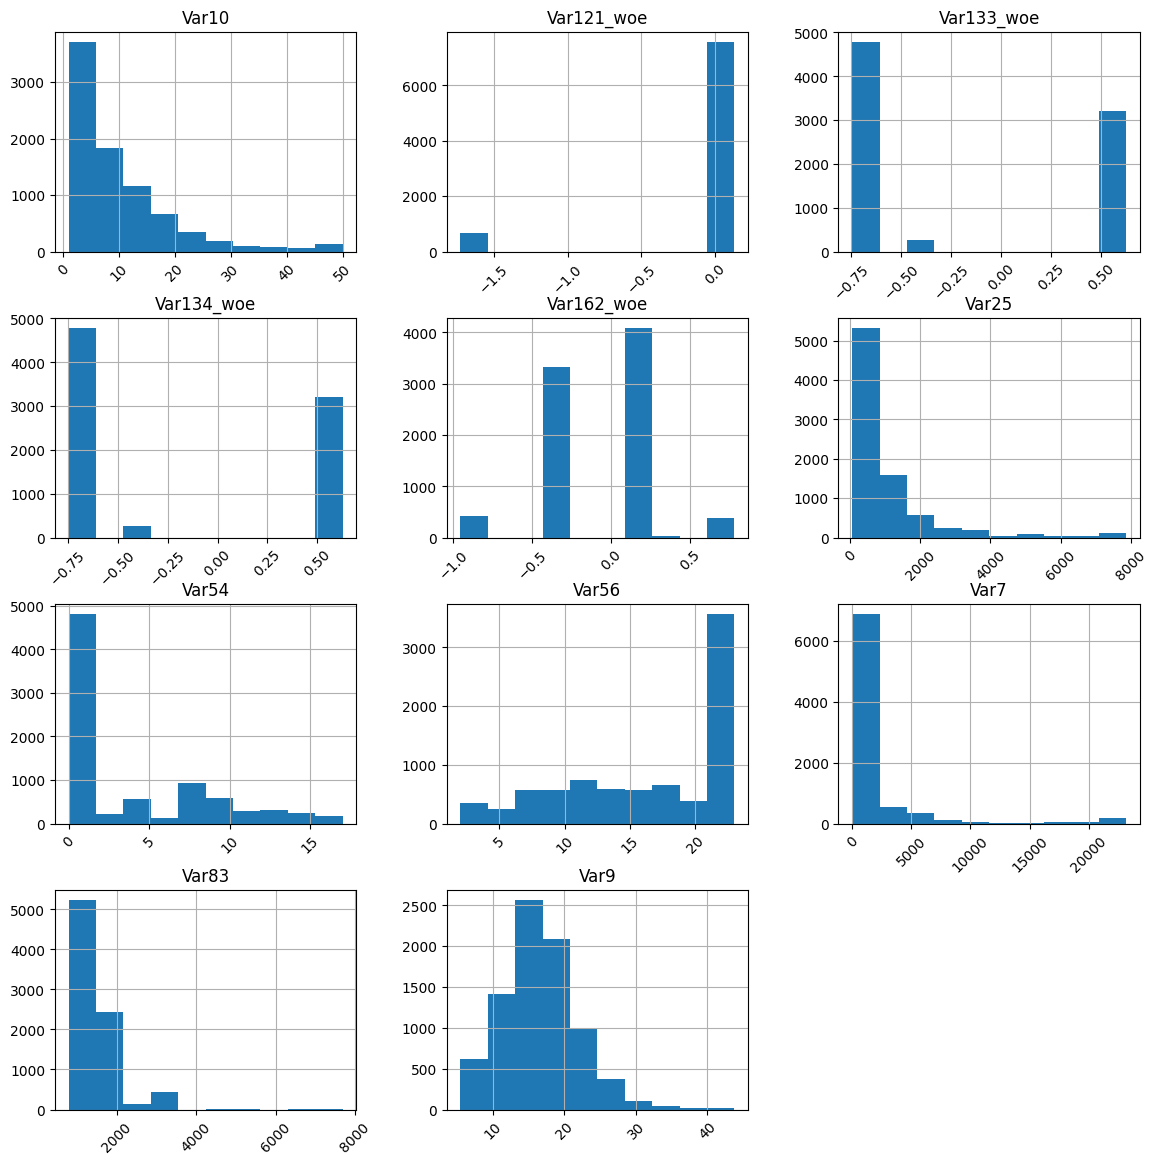

,Features,Count_Method
0,Var10,2
6,Var121_woe,2
9,Var133_woe,2
10,Var134_woe,2
13,Var162_woe,2
17,Var25,2
24,Var54,2
25,Var56,2
27,Var7,2
30,Var83,3


In [68]:
# Methods Selected

selected_method = [corr_top_features_df, woe_top_features_df,beta_top_features_df,lasso_top_features_df,
                   rfe_top_features_df]


# Combining features from all the models
master_df_feature_selection = pd.concat(selected_method, axis =0)
number_of_methods = len(selected_method)
selection_threshold = int(len(selected_method)/2)

print('Selecting features which are picked by more than ', selection_threshold, ' methods')
master_df_feature_selection_v2 = pd.DataFrame(master_df_feature_selection.groupby('Feature').size()).reset_index()
master_df_feature_selection_v2.columns = ['Features', 'Count_Method']
master_df_feature_selection_v3 = master_df_feature_selection_v2[master_df_feature_selection_v2['Count_Method']>=selection_threshold]
final_features = master_df_feature_selection_v3['Features'].tolist()
print('Final Features Selected: ',final_features)
train_features_v2[final_features].hist(figsize = (14,14), xrot =  45)
plt.show()
master_df_feature_selection_v3.head(n=30)

### Union of Variables from all the methods

In [96]:

selected_method = [corr_top_features_df, woe_top_features_df,beta_top_features_df,lasso_top_features_df,
                   rfe_top_features_df]

l1=[]
for meth in selected_method:
    l1=l1+list(meth['Feature'])

l2=list(set(l1))
l2

['Var83',
 'Var24',
 'Var108_woe',
 'Var46_woe',
 'Var11',
 'Var121_woe',
 'Var101',
 'Var31',
 'Var33',
 'Var7',
 'Var123_woe',
 'Var70_woe',
 'Var9',
 'Var20',
 'Var133_woe',
 'Var134_woe',
 'Var162_woe',
 'Var102',
 'Var4',
 'Var56',
 'Var161',
 'Var84',
 'Var54',
 'Var13',
 'Var32_woe',
 'Var10',
 'Var14',
 'Var22',
 'Var44',
 'Var25',
 'Var81',
 'Var111_woe',
 'Var57']

In [141]:

def WOE2(train_features, test_features,train_target, test_target):
    WOE_columns = train_features.columns
    
    woe_encoder = ce.WOEEncoder(cols = WOE_columns)
    
    WOE_encoded_train = woe_encoder.fit_transform(train_features[WOE_columns],train_target).add_suffix('_woe')
    train_features = pd.concat([train_features,WOE_encoded_train],axis=1)
    
    WOE_encoded_test = woe_encoder.transform(test_features[WOE_columns],test_target).add_suffix('_woe')
    test_features = pd.concat([test_features,WOE_encoded_test],axis=1)
    
    model_train_features = train_features.drop(WOE_columns,axis =1)
    test_features_v3 = test_features.drop(WOE_columns,axis =1)
    
    return model_train_features, test_features_v3

In [142]:
model_train_features, test_features_v3= WOE2(train_features, test_features, train_target, test_target)

In [207]:
model_vars=['Var83_woe',
 'Var24_woe',
 'Var108_woe',
 'Var46_woe',
 'Var11_woe',
 'Var121_woe',
 'Var101_woe',
 'Var31_woe',
 'Var33_woe',
 'Var7_woe',
 'Var123_woe',
 'Var70_woe',
 'Var9_woe',
 'Var20_woe',
 'Var162_woe',
 'Var102_woe',
 'Var4_woe',
 'Var56_woe',
 'Var161_woe',
 'Var84_woe',
 'Var54_woe',
 'Var13_woe',
 'Var32_woe',
 'Var10_woe',
 'Var14_woe',
 'Var22_woe',
 'Var44_woe',
 'Var25_woe',
 'Var81_woe',
 'Var111_woe',
 'Var57_woe']

In [218]:
X_test=test_features_v3[model_vars]
y_test=test_set['Target']


# Model Fitting
### Logistic Regression Model

In [208]:
X=model_train_features[model_vars]
y=train_set['Target']

## Implementing the model

In [209]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.066520
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 8242
Model:                          Logit   Df Residuals:                     8211
Method:                           MLE   Df Model:                           30
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                  0.4152
Time:                        21:47:43   Log-Likelihood:                -548.26
converged:                       True   LL-Null:                       -937.59
Covariance Type:            nonrobust   LLR p-value:                1.796e-144
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Var83_woe      1.0254      0.105      9.779      0.000       0.820       1.231
Var24_woe      0.1415      0

#### Variables that have lower P values, are significant to the model !!

In [210]:
## Logistic Regression Model Fitting- where X= model_train_features, y=train_set['Target']
## No need to split as it was already defined as IS and OS


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [ ]:
# Create a table
wald_table = pd.DataFrame({'Variable': X.columns, 'Wald Value': wald_values, 'P-Value': p_values})
wald_table = wald_table.sort_values(by='Wald Value', ascending=False)

# Print or display the table
print(wald_table)

#### Predicting the test set results and caculating the accuracy

In [158]:
y_pred = logreg.predict(X)

In [166]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))


Accuracy of logistic regression classifier on test set: 0.98


### Cross Validation

In [167]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=7)  # Set shuffle=True
modelCV = LogisticRegression()
scoring = 'accuracy'

results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.980


### Confusion Matrix

In [169]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[8030   13]
 [ 142   57]]


Compute precision, recall, F-measure and support
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [173]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8043
           1       0.81      0.29      0.42       199

    accuracy                           0.98      8242
   macro avg       0.90      0.64      0.71      8242
weighted avg       0.98      0.98      0.98      8242



##### Interpretation:###### Of the default set, 81% of defaulted applicants had actually defaulted. On the other hand set,29% of defaulted applicants was approved..

## ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1] fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity)) ggplot(df, aes(x='fpr', y='sensitivity')) +
geom_line() +
geom_abline(linetype='dashed')

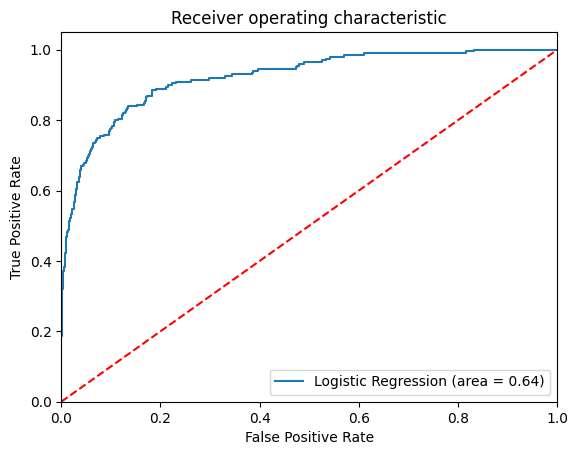

In [174]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, logreg.predict(X))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### Let's predict on Test Data

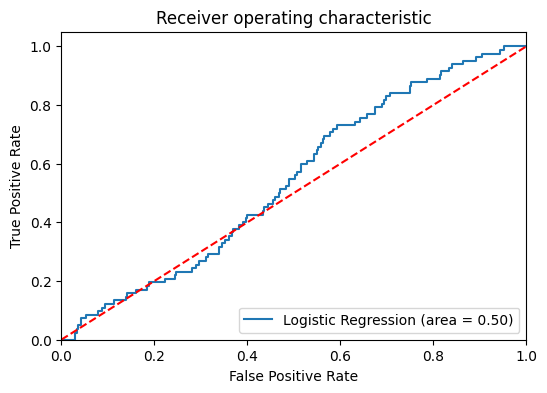

In [219]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Conclusion : Test sample is not holding for this model!

## Let's try XGBoost

In [183]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X, y)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [186]:
# alternatively view the parameters of the xgb trained model
print(xgb_clf)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


### Make predictions with XGBoost Classifier

In [188]:
# make predictions on test data
y_pred = xgb_clf.predict(X)

In [189]:
# check accuracy score
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y, y_pred)))

XGBoost model accuracy score: 0.9934


k-fold Cross Validation using XGBoost
To build more robust models with XGBoost, we must do k-fold cross validation. In this way, we ensure that the original training dataset is used for both training and validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation using the cv() method. In this method, we will specify several parameters which are as follows:-

nfolds - This parameter specifies the number of cross-validation sets we want to build.

num_boost_round - It denotes the number of trees we build.

metrics - It is the performance evaluation metrics to be considered during CV.

as_pandas - It is used to return the results in a pandas DataFrame.

early_stopping_rounds - This parameter stops training of the model early if the hold-out metric does not improve for a given number of rounds.

seed - This parameter is used for reproducibility of results.


parameters to build a k-fold cross-validation model by calling XGBoost's CV() method.

In [192]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [200]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth':5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

xgb_cv contains train and test auc metrics for each boosting round. Let's preview xgb_cv.

In [201]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.710842,0.007621,0.700986,0.019877
1,0.808362,0.008315,0.793258,0.040939
2,0.897757,0.008222,0.892753,0.030430
3,0.906364,0.012900,0.900268,0.029982
4,0.960252,0.006271,0.956555,0.018260


Feature importance with XGBoost
XGBoost provides a way to examine the importance of each feature in the original dataset within the model. It involves counting the number of times each feature is split on across all boosting trees in the model. Then we visualize the result as a bar graph, with the features ordered according to how many times they appear.

XGBoost has a plot_importance() function that helps us to achieve this task. Then we can visualize the features that has been given the highest important score among all the features. Thus XGBoost provides us a way to do feature selection.

I will proceed as follows:-

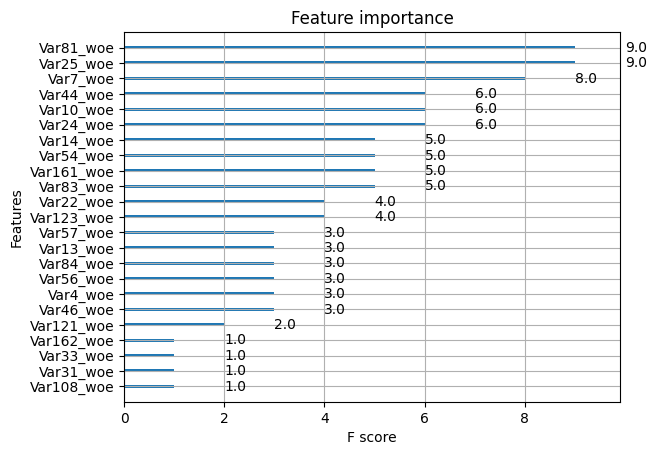

In [195]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

We can see that the feature *Var81* has been given the highest importance score among all the features. Thus XGBoost also gives us a way to do Feature Selection.

### Results and conclusion
In this project, I implement XGBoost with Python and Scikit-Learn to classify the default and non-default applicants

The y labels contain values  0 and 1 i.e. classification problem

I have trained the XGBoost classifier and found the accuracy score to be 99%.

I have done the hyperparameter tuning in XGBoost by doing k-fold cross-validation.

I find the most important feature in XGBoost to be Var81. 

## Wish sample size was LARGER! Could have explored more :)

### Appendix

##### Let's explore the missing values in the data.
Create function to explore the data.

In [51]:
def missing_values_table(application_data):
        # Total missing values
        mis_val = application_data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * application_data.isnull().sum() / len(application_data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(application_data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [52]:
missing_values = missing_values_table(application_data)
missing_values.head(20)

Your selected dataframe has 163 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


##### Great there are no missing values!
Now let's convert categorical variable into LabelEncoded.

In [55]:
pip install scikit-learn

     ---------------------------------------- 9.3/9.3 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 44.3/44.3 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\moina\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [56]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in application_data:
    if application_data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_data[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_data[col])
            # Transform data
            application_data[col] = le.transform(application_data[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [57]:
application_data.head()

,ID,Fold,Target,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163
0,1,0,0,40,3,1,5304.570,0,18.609524,8,...,0,0,0,1,0,0,0,53.04570,1,6
1,2,0,0,26,4,1,884.095,0,25.970874,13,...,0,0,0,0,0,0,0,884.09500,3,5
2,3,0,0,30,2,1,3536.380,0,25.686275,46,...,0,0,0,1,0,0,0,88.40950,1,0
3,4,0,0,52,1,1,884.095,0,18.019608,17,...,0,0,0,0,0,0,0,353.63800,7,2
4,5,0,0,31,2,1,9725.045,0,28.666667,24,...,0,0,0,0,0,0,0,8.84095,9,3


#### Exploring the data more and finding out some anomalies.

In [61]:

# List of columns you want to describe
columns_to_describe = [f'Var{i}' for i in range(4, 163)]

# Create an empty dictionary to store the describe results
describe_results = {}

# Loop through the specified columns and apply the describe function
for column_name in columns_to_describe:
    describe_results[column_name] = application_data[column_name].describe()

# Convert the dictionary to a DataFrame for a more structured result
describe_application_data = pd.DataFrame(describe_results)

# Print the results
print (describe_application_data)


               Var4          Var5          Var6          Var7          Var8  \
count  13015.000000  13015.000000  13015.000000  13015.000000  13015.000000   
mean      38.432885      2.603381      1.042259   1711.539762      0.052555   
std        7.625791      1.059134      0.201187   3564.157915      0.223151   
min       22.000000      1.000000      1.000000     22.092093      0.000000   
25%       33.000000      2.000000      1.000000    297.716000      0.000000   
50%       39.000000      2.000000      1.000000    644.556000      0.000000   
75%       44.000000      3.000000      1.000000   1569.380000      0.000000   
max       55.000000      5.000000      2.000000  23135.055000      1.000000   

               Var9         Var10         Var11    Var12         Var13  ...  \
count  13015.000000  13015.000000  13015.000000  13015.0  13015.000000  ...   
mean      15.369281      9.961583      0.445793      0.0     10.328467  ...   
std        5.217711      9.568189      0.497072    

##### Using loop to apply the describe() function to each column, storing the results in a dictionary where the keys are the column names and the values are the describe results. Finally, converting dictionary into a DataFrame for a more structured output.

This loop will provide  the summary statistics for each of the specified columns. 

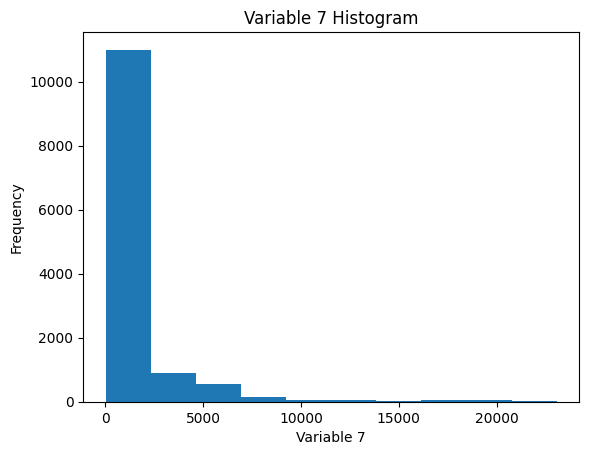

In [75]:
application_data['Var7'].plot.hist(title='Variable 7 Histogram')
plt.xlabel('Variable 7')
plt.show()

In [66]:
## Check for anomaly in variable-i

anom = application_data[application_data['Var7'] == 23135.055000]
non_anom = application_data[application_data['Var7'] != 23135.055000]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['Target'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['Target'].mean()))
print('There are %d anomalous variable-i' % len(anom))

The non-anomalies default on 2.13% of loans
The anomalies default on 4.26% of loans
There are 188 anomalous variable-i


In [72]:
## Check for anomaly in variable-i (similarly, check for any varibles between Var4 to Var163)

anom = application_data[application_data['Var161'] == 2919.220000]
non_anom = application_data[application_data['Var161'] != 2919.220000]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['Target'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['Target'].mean()))
print('There are %d anomalous variable-i' % len(anom))

The non-anomalies default on 2.16% of loans
The anomalies default on 0.00% of loans
There are 34 anomalous variable-i


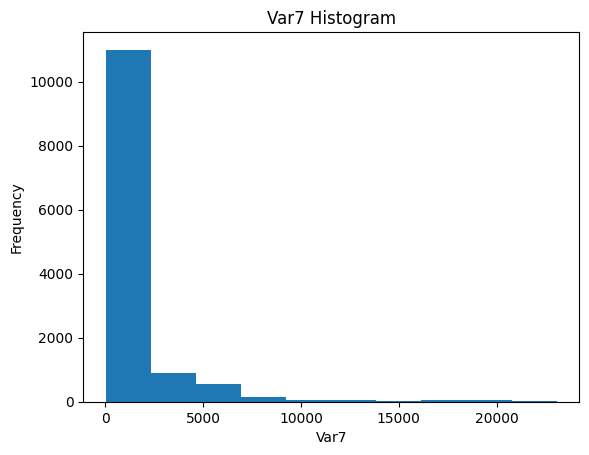

In [77]:
# Create an anomalous flag column
application_data['Var7_ANOM'] = application_data["Var7"] == 23135.055000

# Replace the anomalous values with nan
application_data['Var7'].replace({23135.055000: np.nan}, inplace = True)

application_data['Var7'].plot.hist(title = 'Var7 Histogram');
plt.xlabel('Var7')
plt.show()

In [78]:
# Find correlations with the target and sort
correlations = application_data.corr()['Target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 Var146       0.038003
Var7         0.038813
Var123       0.039860
Var25        0.041112
Var143       0.042482
Var107       0.045755
Var9         0.054554
Var133       0.062357
Var134       0.062357
Var83        0.082554
Var33        0.082865
Target       1.000000
Var12             NaN
Var20             NaN
Var7_ANOM         NaN
Name: Target, dtype: float64

Most Negative Correlations:
 Var56    -0.070906
ID       -0.051695
Var108   -0.034174
Var127   -0.031980
Var129   -0.030701
Var45    -0.028317
Var84    -0.027615
Var79    -0.027024
Var48    -0.026344
Var86    -0.026152
Var52    -0.025774
Var76    -0.025735
Var50    -0.025390
Var15    -0.025091
Var4     -0.023338
Name: Target, dtype: float64


In [81]:
# Find the correlation of the Var4 and target
application_data['Var4'] = abs(application_data['Var4'])
application_data['Var4'].corr(application_data['Target'])

-0.02333795739737322

### Let's assume Var4 is "Age of SAVii's clients"...can we study any trend?

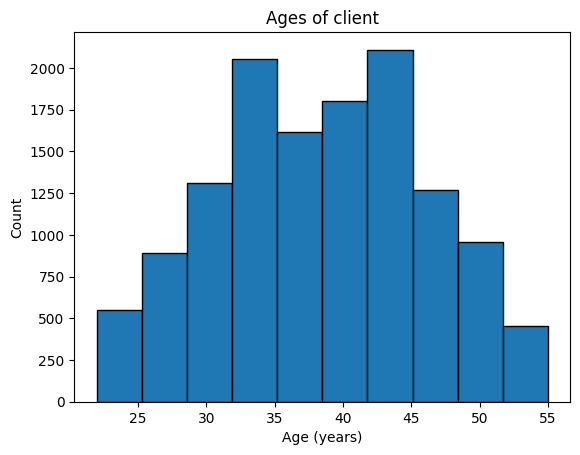

In [98]:
plt.hist(application_data['Var4'], edgecolor='k', bins=10)
plt.title('Ages of client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

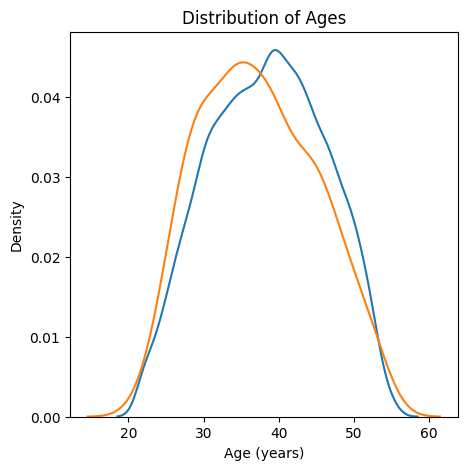

In [97]:
plt.figure(figsize = (5, 5))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_data.loc[application_data['Target'] == 0, 'Var4'], label = "target == 0")

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_data.loc[application_data['Target'] == 1, 'Var4'], label = "target == 1")

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.show()

In [100]:
# Variable information into a separate dataframe
age_data = application_data[['Target', 'Var4']]
age_data['Age'] = age_data['Var4'] 

# Bin the age data
age_data['Age_BINNED'] = pd.cut(age_data['Age'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

C:\Users\moina\AppData\Local\Temp\ipykernel_2820\2667062879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['Age'] = age_data['Var4']
C:\Users\moina\AppData\Local\Temp\ipykernel_2820\2667062879.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['Age_BINNED'] = pd.cut(age_data['Age'], bins = np.linspace(20, 70, num = 11))


,Target,Var4,Age,Age_BINNED
0,0,40,40,"(35.0, 40.0]"
1,0,26,26,"(25.0, 30.0]"
2,0,30,30,"(25.0, 30.0]"
3,0,52,52,"(50.0, 55.0]"
4,0,31,31,"(30.0, 35.0]"
5,0,41,41,"(40.0, 45.0]"
6,0,33,33,"(30.0, 35.0]"
7,0,25,25,"(20.0, 25.0]"
8,0,38,38,"(35.0, 40.0]"
9,0,35,35,"(30.0, 35.0]"


In [101]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('Age_BINNED').mean()
age_groups

C:\Users\moina\AppData\Local\Temp\ipykernel_2820\299311987.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups  = age_data.groupby('Age_BINNED').mean()


,Target,Var4,Age
Age_BINNED,,,
"(20.0, 25.0]",0.021818,23.707273,23.707273
"(25.0, 30.0]",0.032221,28.290564,28.290564
"(30.0, 35.0]",0.023459,33.072366,33.072366
"(35.0, 40.0]",0.021291,38.083072,38.083072
"(40.0, 45.0]",0.017623,42.912636,42.912636
"(45.0, 50.0]",0.015800,47.830785,47.830785
"(50.0, 55.0]",0.020891,52.115599,52.115599
"(55.0, 60.0]",NaN,NaN,NaN
"(60.0, 65.0]",NaN,NaN,NaN


Exterior resources exploration